# Implementation and evaluation of K-nearest neighbors (KNN) algorithm for handwritten digit recognition
### Data Analysis MoBi SoSe2022, Topic 01: Biomedical Image Analysis
### Tutorin: Marie Becker
### Team 02: Lena Fleischhacker, Pia Röhrich, Hellen Röttgen, Benjamin Wehnert
#### July 2022

# Abstract
Digit recognition can be implemented using many different classification methods. The k-nearest neighbors (KNN) algorithm is well-known for its simplicity, however, it quickly reaches limitations when it comes to flexibility.

The main goal of the project was to write an algorithm that accurately recognizes handwritten digits from the MNIST dataset using the KNN method. Prior to the implementation of KNN, the data was z-transformed and dimensionality was reduced through Principal Component Analysis (PCA). 

In addition to digit recognition using KNN, average numbers were generated from the MNIST data set and used for digit recognition as well. Furthermore, the PCA was implemented using singular value decomposition (SVD) instead of eigenvector decomposition. Finally, the digit recognition algorithm was expanded for the recognition of self-written digits.

The KNN algorithm with previous PCA proved to be an accurate but inefficient digit recognition algorithm. It can also be used for the accurate recognition of self-written digits. However, the digit recognition based on just the avergae images proved to be surprisingly accurate despite its simplicity.

# Table of contents

1. Introduction
2. Imports
3. Material
4. Methods <br>
    i. Z-tranformation <br>
    ii. Principal component analysis <br>
    iii. k-nearest neighbors <br>
    iv. Finding optimal k and number of PC's <br>
    v. Expanded code <br>
        a. average numbers <br>
        b. PCA with SVD <br>
        c. Self-written digit recognition <br>
5. Results
    i. Z-tranformation <br>
    ii. Principal component analysis <br>
    iii. k-nearest neighbors <br>
    iv. Finding optimal k and number of PC's <br>
    v. Expanded code <br>
        a. average numbers <br>
        b. PCA with SVD <br>
        c. Self-written digit recognition <br>
6. Discussion
7. Bibliography



# Introduction

Digit recognition is a form of pattern recognition which describes the operation of identifying digits from images. With handwritten numbers, this is not an easy task, as they always look slightly different. Thus, the categories are harder to classify. With almost all processes in everyday life being digitalized, e.g. banking transactions or contact forms, developing such algorithms has become extremely useful and almost inevitable.

For this reason, the MNIST data set has been well studied and analyzed over the past decades, leading to the development of algorithms that recognize digits with the same accuracy as humans. Most works now possess an error rate lower than 1%. (Baldominos et al., 2019) The exhaustive analysis of the MNIST data set laid the foundation for the development of more advanced pattern recognition algorithms such as the detection of house numbers from photos with the Street View house numbers (SVHN) dataset (Netzer et al., 2011) or the recognition of letters in addition to numbers from the Extended MNIST (EMNIST) data set. These algorithms can be very helpful for future applications like better navigation systems.

KNN (k-nearest neighbors) is a machine learning method that can be used for pattern recognition. It assigns a data point to the class that most of its k-nearest neighbors belong to (Govindaraju et al., 2000). This method has also been improved over the past years, especially the problem that pre-determined distance functions limit the learning ability of the algorithm. This led to the development of so-called Deep KNN algorithms (Lecet al. 2021). Another improvement has been the combination of the algorithm with other classification algorithms such as Rocchio using the advantages of both (Guo et al., 2006).

However, to properly understand the fundmentals of machine learning, it is useful to reproduce the basic steps of digit recognition using the MNIST data set and the KNN algorithm. This was done in the first part of the project. First, the data was z-transformed for homogeneity. Secondly, a PCA was implemented to minimize computing power by reducing dimensionality. Consequently, the PCA-transformed data was used for digit recognition based on the KNN method. The final step was finding the optimal number of k's and PCs.

In the second part of the project, the algorithm was expanded and applied differently. These expansions include a digit recognition based on average numbers, a PCA using singular value decomposition instead of eignevector decomposition and the recognition of self-written digits instead of those from the test data set.

# Imports
For the algorithm and the visualization of the results, several functions from the packages numpy, pandas, seaborn and matplotlib were used. For more clarity, self-written functions are stored in other notebooks and are therefore accessed through modules as well.

The MNIST training and test data need to be imported as well. The same applies to the saved z-array, the dimensionality-reduced data array and the average digits so that these do not need to be computed every time the algorithms run.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg

train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
reduced_arr = pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

# Material
The data set that was used for the project is the standardized MNIST data set. MNIST stands for "Modified National Institute of Standard and Technology database". It consists of 70000 images which are divided into a training data set comprising 60000 images and a test data set comprising 10000 images. Each image shows a handwritten digit ranging from zero to nine. The digits were written in the United States by office emloyees and high school students.

The images are stored as grayscaled comma-seperated values (csv) files. Each image consists of 28 x 28 = 784 pixels with intensity values ranging from 0 to 255. This means that all training images can be displayed in a 60000 x 785 array (training array) with the first column giving the number visible in the image. Consequently, the test images can be dispalyed as a 10000 x 785 array (test array).

The digit recognition algorithms are based on the training array only. Otherwise, the accuracy of the algorithm would be adulterated because it is fitted to the test data.

Example images from the training array and test array are displayed in the following:

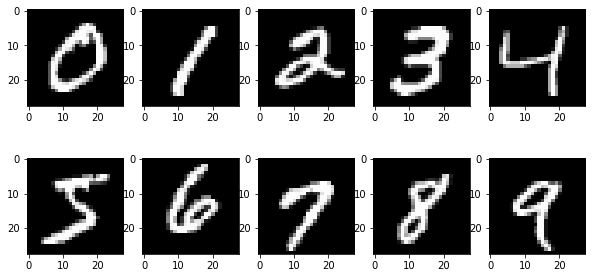

In [7]:
vis.ten_digits(train_array)

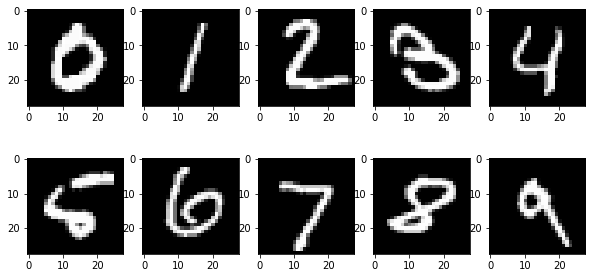

In [6]:
vis.ten_digits(test_array)

# Methods

## Z-Transformation (PCA preparation)
Using the z-transformation, values of a sample are converted to z-scores. The distribution of these z-scores has a mean of 0 and a standard deviation of 1. Z-scores make the sample comparable by making the data non-dimensional. The z-scores are calculated as follows:

$$ Z = \frac{\left(X_i-\bar{X}\right)}{\sigma_{x}} $$

Applied to the project, this means that the average intensity and standard deviation for each pixel needed to be calculated. After that, each pixel in each of the images needed to be z-transformed, meaning that the intensity values are converted to z-scores. There are brightness differences between the images that are not visible when displaying the images because the imshow function adjusts the intensity scale. However, the intensity values of all images need to be brought in line to make them comparable. Converting the data into a z-array, which is hence used instead of the original array, is a necessary step for the ensuing PCA. 

Some pixels, such as those in the corners, have an intensity of zero in all images. Following from this, the mean and thus the standard deviation are zero as well. Because a division by zero is not possible, these pixels can not be z-transformed. Therefor, a cleaned data set (cleaned_train_array) was created in which all colums containing zeroes only are deleted. Of course, the same columns are also deleted from the images inputed into to the algorithm later. The cleaned training array can be accessed using the function clean_train_arr. 

The algorithm for the z-transformation of the training array can be accessed through the self-written function z_arr. The function z_transformation additionally z-tranforms an image using the means and standard deviation of the training data. For shorter run times, the z-transformed array was stored an can be accessed through the function load_z_arr_train.

## Principal Component Analysis (PCA)

PCA is used for dimensionality reduction and therefor implemented ahead of KNN. KNN is a lazy learning algorithm, meaning that instead of learning from the training data, the algorithm simply compares input with the trainig data each time it runs. Consequently, a dimension reduction shortens the run time. PCA is a method commonly used in data science and pattern recognition with many sources avaible that can be used for reference (Anowar et al., 2021).

Despite losing dimensions, hardly any information should be lost. Therefore, the first step of a PCA is to identify the correlation between different features of the dataset and putting those values into a correlation matrix. This is done by using the Pearson correlation which is calcualted as follows:

$$ Corr(x,y) = \frac{1}{{N-1}}\sum_{i=1}^N\frac{(x_i-\overline{x})}{s_x}\frac{(y_i-\overline{y})}{s_y}\ $$

After this step, the eigenvectors v and eigenvalues λ of the covariance matrix A are calculated. The relationship between a matrix, eigenvectors and eigenvalues is expressed in the following equation:

$$ Av_i=λ_iv_i $$

If calculated by hand, the eigenvalues need to be calculated in order to find the eigenvectors. The eigenvalues are the diagonal entries of a matrix S which can be found through diagonalisation of A, satisfying the following equation:

$$ S=\frac{1}{N-1}\, (X_{CS}V)'\, (X_{CS}V) $$

Spatially, the diagonalization describes a rotation of the correlation matrix. This allows to look at the data points from a different angle, defining new axes/features called principal components. These are inserted into a new matrix and sorted according to their corresponding eigenvalues. The higher the eigenvalue, the higher the amount of variance covered. 

From eigenvalue matrix, a certain number k of principal components is chosen, a step that is further explained under finding the optimal k and number of PC's.

The last step of a PCA is the transformation of the original data matrix with the principal components. This is done by computing the dot product of A with a matrix made up of the top k eigenvectors, resulting in the transformed data matrix.

In summary, the principal components allow to reduce dimensions and run time by leaving out highly correlated information.

In the project, these steps were implemented using a self-written PCA function. In this case, the features are the intensity values. The algorithm follows the steps mentioned above mainly using numpy functions. However, instead of calculating the Pearson Correlation in the first step, just the covariance is calculated as the division by the standard deviation becomes unnecessary due to the the previous z-transformation.


## K-nearest neighbors (KNN)
K-nearest neighbors (KNN) is the machine learning algorithm that was used to classify the numbers. It is a simple, supervised machine learning algorithm.



## Finding optimal k and number of PC's

## Expanded code

hier könnte ihr flowchart stehen

### Average images

To get a first impression of how related the images in the data set are, an algorithm calculating average digits was implemented. The according steps were saved in the avg_digit_img function. 

The calculation is done by 
 1. Choosing all images from the training data set displaying one same number
 2. Summing up the intensity values for each pixel of these images
 3. Dividing the intensity sums by the number of images used

In the next step, the average images are used for digit recognition in a function called mean_pred. This is done by substracting the instensity values of each average digit from the inputed image. The algorithm identifies the image as the digit with the lowest intensity difference. The average images are stored so that they do not need to be computed all over again each time the algorithm runs.

The digit recognition using average images was further developed by weighting certain pixels more with the function mean_pred_weighted. The weighting is done based on the variance covered by each pixel. This means that the intensity differences of every pixel are summed up over all images in the train array. The sum is then divided by the summed up intensity differences of all pixels to receive the percentage of the global variance. The weightings are then multiplied with the intensity differences calculated between the inputed image and all average images, which gives high-variance pixels a higher weight.

### PCA with singular value decomposition (SVD)

Instead of using the eigenvector decomposition of the correlation matrix to calculate the principal components, singular value decomposition (SVD) can be applied. The main difference between the two decomposition methods is that the matrices do not need to be square matrices for SVD. All matrices satisfy the following equation:

$$ M = USV^{T} $$

The columns of the matrix S are used as the principal components. The corresponding function is called PCA_SVD. It identifies the principal components as explained and computes the dot product of the data matrix with the top k eigenvectors. The steps are implemented as explained in the review by Anowar F., Sadaoui S. and Selim B. (2021).


### Self-written digit recognition

In addition to using the PCA und KNN algorithm to recognize numbers from the MNIST data set, it is used to recognize digits self-written digits. These images need to be imported in square format. The function is labeled load_jpg. It comprises the following steps:

1. importing a jpeg image of the handwritten digit into the notebook using functions from the pillow package.
2. reformatting the image to make it comparable with training images from MNISt data set <br>
    i.  conversion to grayscale <br>
    ii.  reshaping the jpeg into a numpy array <br>
    iii.  deleting rows and columns so that tha overall number of pixels is divisible by 28 <br>
    iv. reducing the number of pixels in the image to 784 by averaging squares of pixels and creating a 28x28 image from the means <br>
3. apply z-transformation, PCA and KNN algorithms to image


# Results


## Results Z-Transformation

After the z-transformation, the digits look different from the original ones as can be seen in the following example:

In [ ]:
#Bild mit z-transformierten Zahlen

## Results PCA

Before the implementation of the PCA, the features showed some correlation to each other. This became even clearer after the z-transformation. This can be seen in the following plots which show 784 features on both x- and y-axis. The color describes how high the correlation is. 



In [ ]:
# correlation before PCA


The PCA allowed to reduce correlation between the featrues to 0. This can be seen in the following graph.

In [ ]:
# correlation after PCA

In [ ]:
#evtl. code mit von PC's abgedeckter Varianz

The data points representing the same number form clusters which can be detected if the data is displayed in a two- or three-dimensional coordinate system with the principal components as axes.

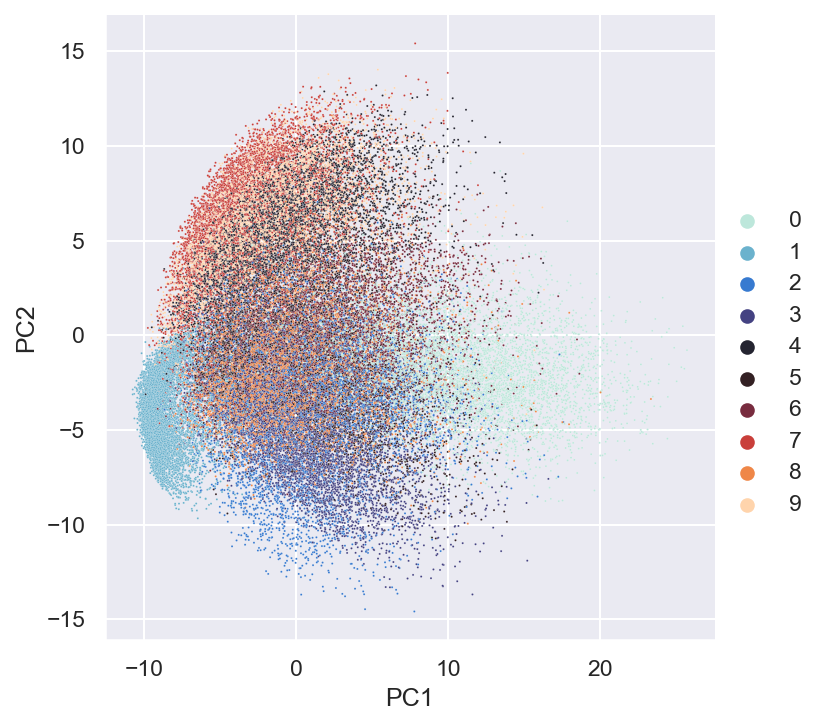

In [3]:
vis.principal_comp_2d(reduced_arr, train_array[:,0], i=1, j=2)

## Results KNN

## Results Finding optimal k and number of PC's

In [ ]:
#Graphen von Bennis Analysen

## Results expanded code 

### Average images
The average digits are shown in the following:

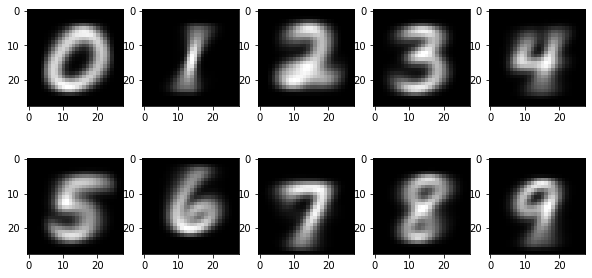

In [3]:
avg.digits(train_array)

The average images were used for recognizing the images from the test array. The (function  without pixel weight) acheived an accuracy of 66.85%. The (function with pixel weight) was able to lift this number up to 72.07%.

### PCA with singular value decomposition (SVD)

### Self-written digit recognition

In [ ]:
#code showing screenshot and 28x28 pixel picture

# Discussion

All three steps for digit recognition using the KNN method were implemented successfully, leading to an algorithm that recognizes digits from the MNIST data set with an accuracy of 97,6% . There are many interesting ways in which the code can be expanded or applied differently and many other possible approaches to tackle the problem given. Only some of these were explored during the project, leaving many ideas to be addressed by future research.

The implementation of the PCA in the second step was successful, which can be seen because correlation between the variable was reduced to zero. Two-dimensional plots displaying the results of the PCA already show some clustering. Some numbers, such as  1, form particularly well visible clusters. 

Thirdly, the KNN algorithm was implemented. The biggest struggle concerning this step is run time. The fact that it does not build a model but compares data at the time of input makes it very simple but also requires a lot of computing power. The bigger the training data set is, the more inefficient the algorithm becomes. KNN does not actually learn, which means that the accuracy and flexibility are limited. This is further discussed when it comes to the recognition of self-written digits. However, the algorithm was sufficient for the size of the MNIST data set and allowed good predictions in relatively short run times. For future research, the algorithm should be improved as already done by Le et al. (2021). More complex algorithms such as neural networks could lead to even higher accuracies while reducing computing power at the same time.

A second obstacle while implementing the KNN algorithm is the identification of the ideal k. Firstly, run times are long to determine the accuracy of the algorithm using different ks. Secondly, the first accuracy analysis showed that the accuracy values for k 3 to 5 were very similar. A decision based on just the accuracy values would therefore have been rather random. Generally, it is useful to choose an odd k to avoid ties.  Of course, choosing an even k is also possible, though it requires a refinement of the algorithm of how to handle ties in a way that does not lead to a loss of accuracy. Out of the two options left, 3 was chosen as the optimal k because it requires the smallest computing power.

In addition to choosing the right k, testing the accuracy of different PCs stretches out the run time even more. Based on accuracy values, using 30 PCs was determined as the optimal number. Interestingly, the total variance covered does not directly correlate with the accuracy of the predictions. The 30 PCs chosen cover only 70% of the variance, however, predictions are very accurate. The other 30% of the variance are not tightly associated with accuracy anymore. The reason for this probably is that the images classified wrongly are so unclear that they simply can not be identified correctly, just like some numbers can not even be recognized by humans. (noch genauer erklären wie  Anzahl ausgesucht wurde?)

In the expansion of the project, three different ideas were pursued.

The first idea was digit recognition based on average digits. For this, average digits were computed which were surprisingly recognizable. Even more surprising was that digits from the test array could be identified correctly with quite a high accuracy based on the average images. This accuracy was further improved by weighting certain pixels that cover a higher amount of variance more. This shows how much accuracy can be achieved by a very simple operation not requiring much computing power. It almost depicts an alternative to using KNN, because it is quite accurate taking into consideration the short run time and the simplicity of the algorithm.

The second expansion was the implementation of the PCA with SVD instead of eigenvector decomposition. (results PCA with SVD in comparison)

The third idea was the application of the algorithm for recognition of  self-written digits. These could be recognized with high accuracy. However, the code quickly reached its limitations when the numbers were not written the US way but the European way. This is logical as the classification is made based on the training array which consists of US numbers only. Again, this shows the limitations of KNN, as the limited training set limits flexibility. More advanced algorithms such as neural networks would learn from mistakes and then learn to identify both US and European numbers. An idea to improve KNN in regard to this problem could be to correct misclassified digits and add them to the training array each, thereby training the algorithm to recognize these numbers. 

Another interesting application of pattern recognition based on the given data set and code would be the recognition of numbers from images. However, this is a much harder task as the intensity differences are not as high. An attempt would be to first divide the image into two intensities using a cutoff. Digit recognition from images opens up a whole new field and is much more difficult, as explored by Netzer et al. (2011).
For wider application, the algorithm could be trained to recognize two- or multi-figure  numbers. This would require another step prior to the KNN to recognize that there are are several digits and then classifying these individually. 

In summary, the task of recognizing digits using a KNN algorithm was fulfilled successfully. Many other applications of the code and data set are possible that are left for exploration in the future. However, especially approaches using other machine learning algorithms are promising as the KNN algorithm quickly reaches limitations.

# Bibliography
1. Netzer, Y. et al. (2011)."Reading Digits in Natural Images with Unsupervised Feature Learning." Proceedings of the Workshop on Neural Information Processing Systems 
2. Baldominos, A., Saez, Y., Isasi, P. (2019) A Survey of Handwritten Character Recognition with MNIST and EMNIST
3. Govindaraju, V., Ianakiev, K. (2000) Potential improvement of classifier accuracy by using fuzzy measures
4. Le, L., Xie, Y., Raghavan, VV. (2021) KNN Loss and Deep KNN
5. Guo, GD., Wang, H., Bell, D., Bi, YX., Greer, K. (2006) Using kNN model for automatic text categorization
6. Anowar F., Sadaoui S., Selim B. (2021) Conceptual and empirical comparison of dimensionality reduction algorithms (PCA, KPCA, LDA, MDS, SVD, LLE, ISOMAP, LE, ICA, t-SNE)